**1- Install Modules:**

install ultralytics for YOLO-World

In [1]:
#-- Install-----------------------------------------------------------------------------------------------------
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
#---------------------------------------------------------------------------------------------------------------

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


**2- Import Modules:**

In [9]:
#-- Import -----------------------------------------------------------------------------------------------------
from ultralytics import YOLO

import cv2

import matplotlib.pyplot as plt

import os

import random
#---------------------------------------------------------------------------------------------------------------

**3- Initialize Params:**

This project was written and executed on kaggle.com. If you choose to run it in a different environment, please ensure to configure the path variables according to your specific path.

In [3]:
#-- Initialize ---------------------------------------------------------------------------------------------------
out_path = '/kaggle/working/'
images_dir = '/kaggle/input/yolo-world-test-imgs/'

quadcopter_classes = ['quadcopter', 'bird']
drone_classes = ['drone', 'bird']

CONF_Values = [i / 10.0 for i in range(1, 10)]
IOU_Values = [i / 10.0 for i in range(1, 10)]
#-----------------------------------------------------------------------------------------------------------------

**4- Create and Test YOLO-World model on quadcopter:**

In [4]:
#-- Create and Test YOLO-World model on quadcopter ----------------------------------------------------------------

#-- Create Model --
model = YOLO('yolov8l-world.pt')
display.clear_output()

#-- Set Custome Classes --
model.set_classes(quadcopter_classes)

#-- Run Model to Predict Objects on Test Images --
project_value = 'quadcopter'
for conf in CONF_Values:
    for iou in IOU_Values:
        name_value = 'prediction_' + str(conf) + '_' + str(iou)           
        model.predict(source = images_dir,
                      conf = conf,
                      iou = iou,
                      show = False,
                      save= True,
                      project= project_value,
                      name=name_value) 
        
display.clear_output()
print('Finished Predicting :)')
#-----------------------------------------------------------------------------------------------------------------

Finished Predicting :)


**5- Create and Test YOLO-World model on Drone:**

In [6]:
#-- Create and Test YOLO-World model on Drone ----------------------------------------------------------------

#-- Create Model --
model = YOLO('yolov8l-world.pt')
display.clear_output()

#-- Set Custome Classes --
model.set_classes(drone_classes)

#-- Run Model to Predict Objects on Test Images --
project_value = 'drone'
for conf in CONF_Values:
    for iou in IOU_Values:
        name_value = 'prediction_' + str(conf) + '_' + str(iou)           
        model.predict(source = images_dir,
                      conf = conf,
                      iou = iou,
                      show = False,
                      save= True,
                      project= project_value,
                      name=name_value) 
        
display.clear_output()
print('Finished Predicting :)')
#-----------------------------------------------------------------------------------------------------------------

Finished Predicting :)


**6- Plot result:**

In [7]:
#-- Plot result for: Quadcopter next to Drone -------------------------------------------------------------------
def Plot_Images(images, conf, iou):    
            
    #-- create figure --
    fig, axes = plt.subplots(1, 2, figsize=(10, 20))            
    axes = axes.flatten()

    for i, (img, ax) in enumerate(zip(images, axes)):
        ax.imshow(img)          
        ax.set_xticks([])
        ax.set_yticks([])  
        
        title = f'conf={conf} - iou={iou}'
        if i==0:
            title = 'quadcopter: ' + title
        else:
            title = 'drone: ' + title
        ax.set_title(title)       

        plt.tight_layout()

    #-- set file name and title --
    file_name = f'{img_f}--conf={conf} - iou={iou}.png'
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()
#-----------------------------------------------------------------------------------------------------------------    

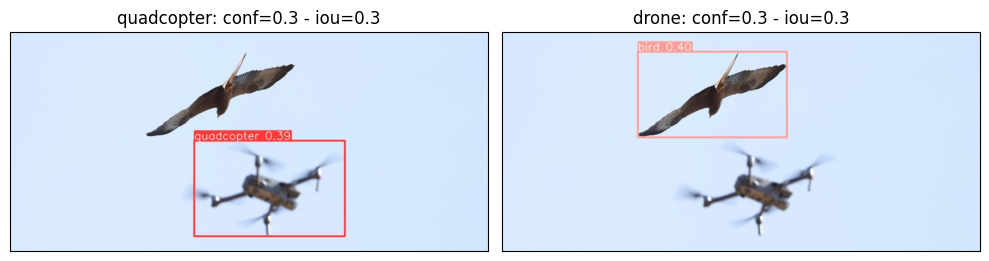

------------------------------------------------------------------------------------


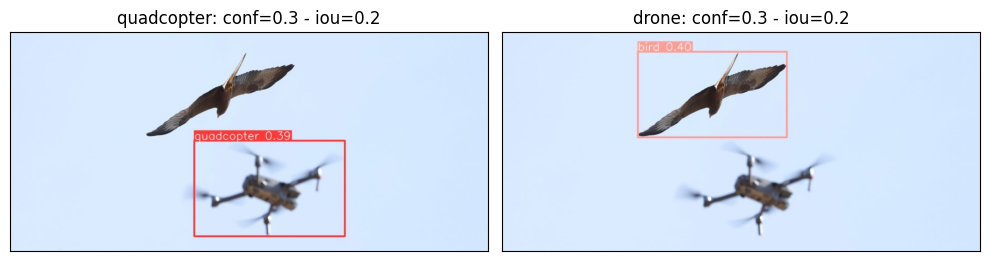

------------------------------------------------------------------------------------


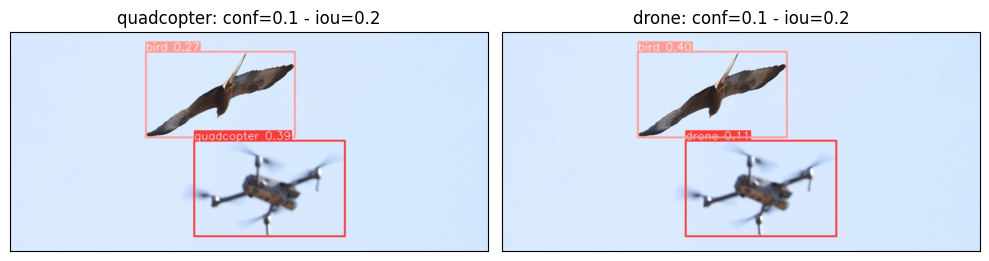

------------------------------------------------------------------------------------


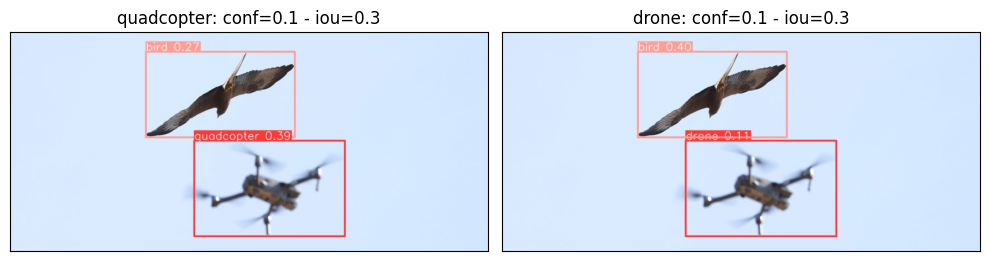

------------------------------------------------------------------------------------


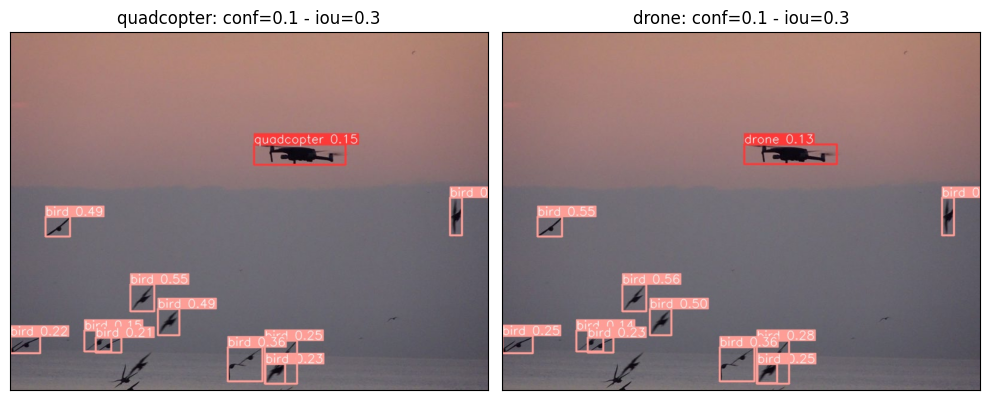

------------------------------------------------------------------------------------


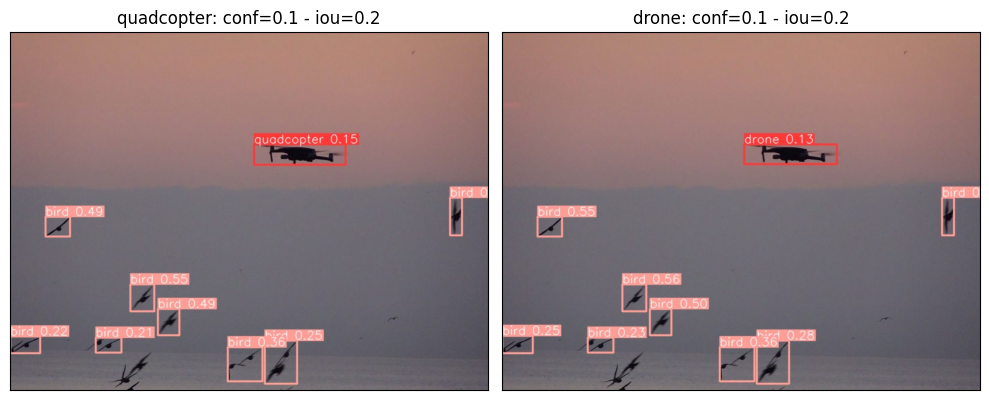

------------------------------------------------------------------------------------


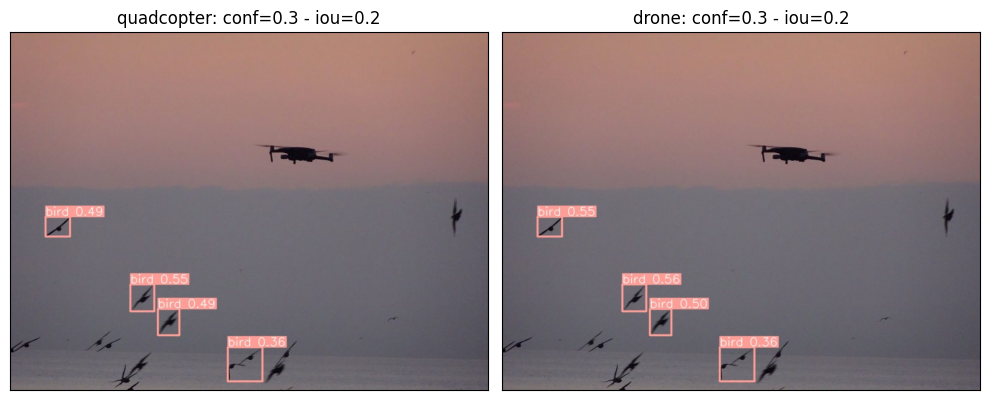

------------------------------------------------------------------------------------


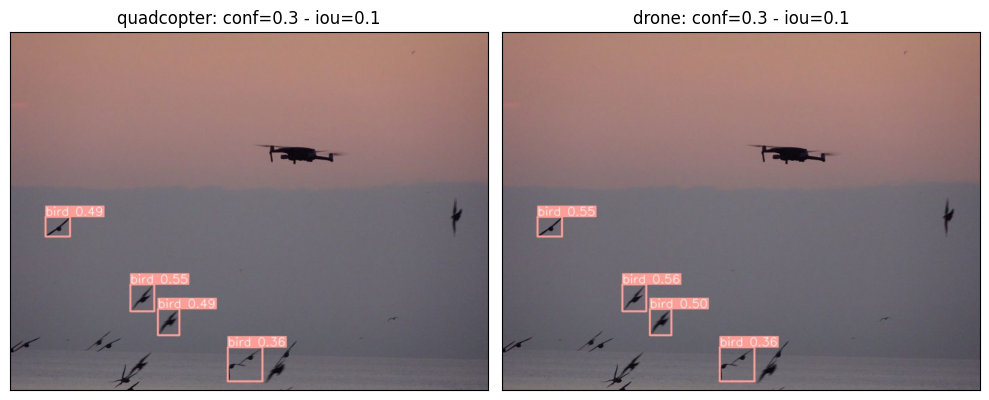

------------------------------------------------------------------------------------


In [16]:
#-- Plot quadcopter next to drone -----------------------------------------------------------------------------
#-- get list of all images --
image_files = [f for f in os.listdir(images_dir)]   
random.shuffle(image_files)

#-- Select 5 random images --
selected_images = image_files[:2]

for img_f in selected_images:
    
    for conf in random.sample(CONF_Values, 2):
        for iou in random.sample(IOU_Values, 2):   
            
            #-- result image from quadcopter
            pred_img_path_1 = out_path + 'quadcopter/' + 'prediction_' + str(conf) + '_' + str(iou) + '/'
            pred_img_file_1 = os.path.join(pred_img_path_1, img_f)
            pred_img_1 = cv2.imread(pred_img_file_1)
            pred_img_1 = cv2.cvtColor(pred_img_1, cv2.COLOR_BGR2RGB) 
            
            #-- result image from drone
            pred_img_path_2 = out_path + 'drone/' + 'prediction_' + str(conf) + '_' + str(iou) + '/'
            pred_img_file_2 = os.path.join(pred_img_path_2, img_f)
            pred_img_2 = cv2.imread(pred_img_file_2)
            pred_img_2 = cv2.cvtColor(pred_img_2, cv2.COLOR_BGR2RGB)   
            
            images= []
            images.append(pred_img_1)
            images.append(pred_img_2)           
            
            Plot_Images(images, conf, iou)
            print('------------------------------------------------------------------------------------')
    
#-----------------------------------------------------------------------------------------------------------------